In [2]:
import sys
sys.path.append(rf"/Users/baia/Desktop/PYTHON/mba_dsa_usp_esalq")

from TCC.utils.constantes import *
import matplotlib.pyplot as plt

## SOCIAL DOMINANCE AND SOCIAL VOLUME

- Social Dominance: Mede onde está o foco da "Manada". Preços seguem a narrativa. Se ninguém fala de Bitcoin, mas todos falam de Altcoins, o capital de varejo está rotacionando.
- Social Volume: Mede a Magnitude Relativa do Hype. O Logaritmo é obrigatório aqui porque eventos virais seguem uma "Lei de Potência" (Power Law). Um dia viral tem 100x mais mensagens que um dia normal. Sem log, esse dia distorce todo o modelo.

start_date: '2011-9-23'

In [3]:
df_eth_onchain_metrics = pd.read_csv(rf"raw/2011_btc_altcoin_santiment.csv")
df_eth_onchain_metrics['Data_UTC'] = pd.to_datetime(df_eth_onchain_metrics['Date'], utc=True).dt.strftime("%Y-%m-%d")
# df_eth_onchain_metrics = df_eth_onchain_metrics.query("Data_UTC > '2015-08-06'")
# df_eth_onchain_metrics = df_eth_onchain_metrics.query("Data_UTC > '2015-08-06'")


df_base = df_eth_onchain_metrics.copy()
df_base = df_base.rename(columns={'BTC / USD':'btc_price',
                                  'Social Volume (btc OR bitcoin)':'btc_social_volume',
                                  'Social Dominance (btc OR bitcoin)':'btc_social_dominance',
                                  'Social Volume (altcoin OR altcoins OR "altcoin season" OR "altcoin pump" OR "altcoin rally")':'alt_social_volume',
                                  'Social Dominance (altcoin OR altcoins OR "altcoin season" OR "altcoin pump" OR "altcoin rally")':'alt_social_dominance',
                                  'Social Volume (ethereum OR eth OR solana OR sol OR cardano OR ada OR polkadot OR dot OR ripple OR xrp OR dogecoin OR doge OR memecoin OR shiba)':'alt_social_volume_2',
                                  'Social Dominance (ethereum OR eth OR solana OR sol OR cardano OR ada OR polkadot OR dot OR ripple OR xrp OR dogecoin OR doge OR memecoin OR shiba)':'alt_social_dominance_2',
                                  })

df_base

,Date,btc_price,btc_social_volume,alt_social_volume,alt_social_volume_2,btc_social_dominance,alt_social_dominance,alt_social_dominance_2,Data_UTC
0,2011-12-15T00:00:00.000Z,NaN,183,0,0,20.99,0.000000,0.000000,2011-12-15
1,2011-12-16T00:00:00.000Z,NaN,185,1,3,21.29,0.115075,0.345224,2011-12-16
2,2011-12-17T00:00:00.000Z,NaN,143,0,0,21.28,0.000000,0.000000,2011-12-17
3,2011-12-18T00:00:00.000Z,NaN,158,0,0,21.24,0.000000,0.000000,2011-12-18
4,2011-12-19T00:00:00.000Z,NaN,236,0,0,20.49,0.000000,0.000000,2011-12-19
...,...,...,...,...,...,...,...,...,...
5074,2025-11-05T00:00:00.000Z,103893.666274,5914,487,3397,7.14,0.587604,4.100000,2025-11-05
5075,2025-11-06T00:00:00.000Z,101286.243503,5193,494,2893,6.81,0.648234,3.800000,2025-11-06
5076,2025-11-07T00:00:00.000Z,103373.368960,4779,490,2661,5.86,0.600630,3.260000,2025-11-07
5077,2025-11-08T00:00:00.000Z,102278.980872,3570,405,2015,5.29,0.599609,2.980000,2025-11-08


In [4]:
print("Social Volume and Dominance")
df_btc = (
    df_base
    # 1. Garante que temos as colunas base necessárias
    # [['Data_UTC', 'transaction_volume_eth', 'transaction_volume_usdc', 'daily_onchain_trans_profit_to_loss_ratio', 'amount_of_holders_eth','gas_used_eth','eth_spent_over_time']]
)

df_base = df_btc.copy()
df_base['Data_UTC'] = pd.to_datetime(df_btc['Data_UTC'], utc=True,).dt.strftime("%Y-%m-%d")
df_base['Data_UTC'] = pd.to_datetime(df_btc['Data_UTC'], utc=True,)
# Visualizar as primeiras linhas
df_base.columns

Social Volume and Dominance


Index(['Date', 'btc_price', 'btc_social_volume', 'alt_social_volume',
       'alt_social_volume_2', 'btc_social_dominance', 'alt_social_dominance',
       'alt_social_dominance_2', 'Data_UTC'],
      dtype='object')

In [5]:
df_social = (
    df_base#[['Data_UTC','btc_price','btc_social_volume','btc_social_dominance']]
    .sort_values('Data_UTC')
    
    # 1. Transformação Logarítmica (CRUCIAL para dados de contagem)
    # np.log1p evita erro de log(0) se o volume for zero.
    .assign(btc_log_vol = lambda df: np.log1p(df['btc_social_volume']))
    .assign(alt_log_vol_1 = lambda df: np.log1p(df['alt_social_volume']))
    .assign(alt_log_vol_2 = lambda df: np.log1p(df['alt_social_volume_2']))
    .assign(alt_log_dom_1 = lambda df: np.log1p(df['alt_social_dominance']))
    .assign(alt_log_dom_2 = lambda df: np.log1p(df['alt_social_dominance_2']))

    # 2. Social Volume e Dominance (Soma dos Altcoins)
    .assign(alt_total_log_vol = lambda df: df['alt_log_vol_1'] + df['alt_log_vol_2'])
    .assign(alt_total_log_dom = lambda df: df['alt_log_dom_1'] + df['alt_log_dom_2'])
    
    # 3. O Spread de Intensidade (Feature Principal)
    # Positivo: O barulho do Bitcoin é maior (Logaritmicamente)
    # Negativo: As Altcoins estão gritando mais alto
    .assign(social_vol_log_spread = lambda df: df['btc_log_vol'] - df['alt_total_log_vol'])
    
    # 43. Aceleração do Hype (Derivada)
    # O barulho está aumentando ou diminuindo em relação a ontem?
    .assign(social_momentum = lambda df: df['social_vol_log_spread'].diff())

    # 4. (Opcional) Z-Score Total do Mercado
    # O mercado está eufórico (muito volume geral) ou apático?
    .assign(total_market_noise_z = lambda df: 
            ((df['btc_log_vol'] + df['alt_total_log_vol']) - (df['btc_log_vol'] + df['alt_total_log_vol']).rolling(30).mean()) /
            (df['btc_log_vol'] + df['alt_total_log_vol']).rolling(30).std()
    )
    .fillna(0)

    # [['Data_UTC', 'social_vol_log_spread', 'social_momentum', 'total_market_noise_z']]
)

df_social

,Date,btc_price,btc_social_volume,alt_social_volume,alt_social_volume_2,btc_social_dominance,alt_social_dominance,alt_social_dominance_2,Data_UTC,btc_log_vol,alt_log_vol_1,alt_log_vol_2,alt_log_dom_1,alt_log_dom_2,alt_total_log_vol,alt_total_log_dom,social_vol_log_spread,social_momentum,total_market_noise_z
0,2011-12-15T00:00:00.000Z,0.000000,183,0,0,20.99,0.000000,0.000000,2011-12-15 00:00:00+00:00,5.214936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.214936,0.000000,0.000000
1,2011-12-16T00:00:00.000Z,0.000000,185,1,3,21.29,0.115075,0.345224,2011-12-16 00:00:00+00:00,5.225747,0.693147,1.386294,0.108922,0.296561,2.079442,0.405482,3.146305,-2.068631,0.000000
2,2011-12-17T00:00:00.000Z,0.000000,143,0,0,21.28,0.000000,0.000000,2011-12-17 00:00:00+00:00,4.969813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.969813,1.823508,0.000000
3,2011-12-18T00:00:00.000Z,0.000000,158,0,0,21.24,0.000000,0.000000,2011-12-18 00:00:00+00:00,5.068904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.068904,0.099091,0.000000
4,2011-12-19T00:00:00.000Z,0.000000,236,0,0,20.49,0.000000,0.000000,2011-12-19 00:00:00+00:00,5.468060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.468060,0.399156,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,2025-11-05T00:00:00.000Z,103893.666274,5914,487,3397,7.14,0.587604,4.100000,2025-11-05 00:00:00+00:00,8.685247,6.190315,8.130942,0.462226,1.629241,14.321258,2.091467,-5.636011,0.019069,1.581117
5075,2025-11-06T00:00:00.000Z,101286.243503,5193,494,2893,6.81,0.648234,3.800000,2025-11-06 00:00:00+00:00,8.555259,6.204558,7.970395,0.499704,1.568616,14.174953,2.068320,-5.619693,0.016318,0.958942
5076,2025-11-07T00:00:00.000Z,103373.368960,4779,490,2661,5.86,0.600630,3.260000,2025-11-07 00:00:00+00:00,8.472196,6.196444,7.886833,0.470397,1.449269,14.083277,1.919666,-5.611081,0.008612,0.570629
5077,2025-11-08T00:00:00.000Z,102278.980872,3570,405,2015,5.29,0.599609,2.980000,2025-11-08 00:00:00+00:00,8.180601,6.006353,7.608871,0.469759,1.381282,13.615224,1.851041,-5.434623,0.176458,-0.958466


## Bitcoin

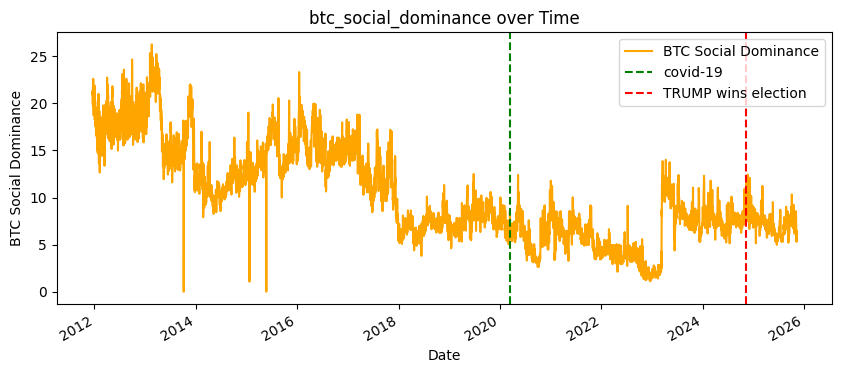

In [6]:
plt.figure(figsize=(10,4))
plt.plot(df_social['Data_UTC'], df_social['btc_social_dominance'], label='BTC Social Dominance', color='orange')
plt.xlabel('Date')
plt.ylabel('BTC Social Dominance')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('btc_social_dominance over Time')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()


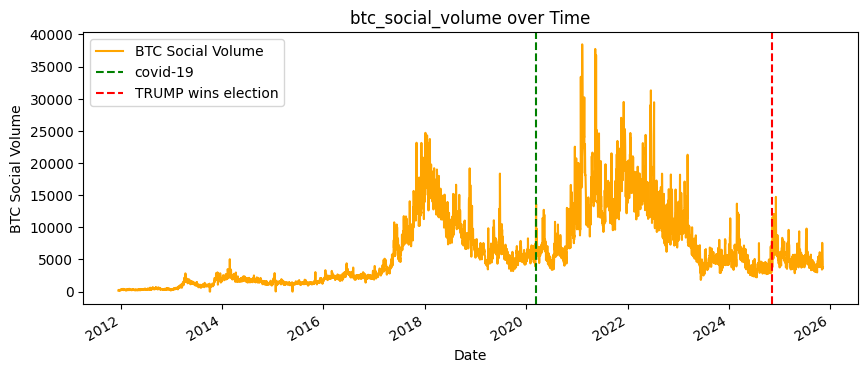

In [7]:
plt.figure(figsize=(10,4))
plt.plot(df_social['Data_UTC'], df_social['btc_social_volume'], label='BTC Social Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('BTC Social Volume')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('btc_social_volume over Time')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()


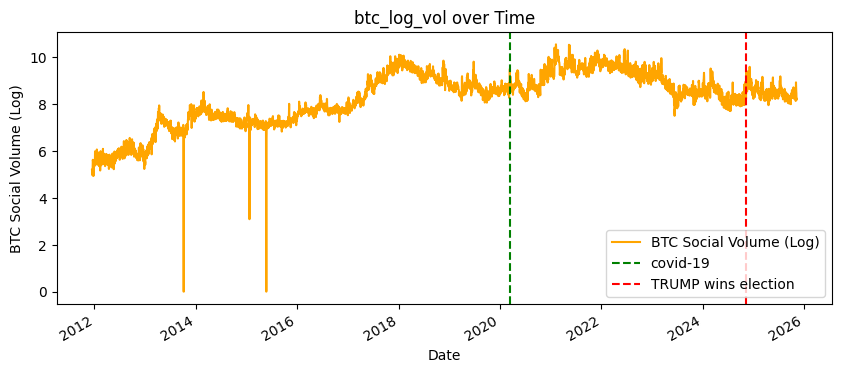

In [8]:
plt.figure(figsize=(10,4))
plt.plot(df_social['Data_UTC'], df_social['btc_log_vol'], label='BTC Social Volume (Log)', color='orange')
plt.xlabel('Date')
plt.ylabel('BTC Social Volume (Log)')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('btc_log_vol over Time')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()


## altcoins

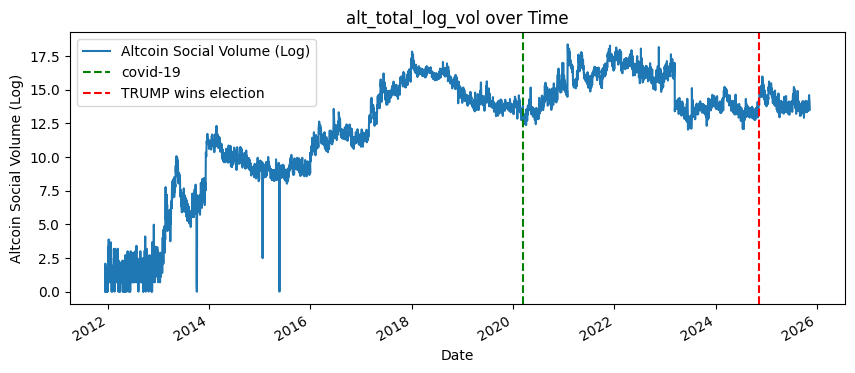

In [9]:
plt.figure(figsize=(10,4))
plt.plot(df_social['Data_UTC'], df_social['alt_total_log_vol'], label='Altcoin Social Volume (Log)')
plt.xlabel('Date')
plt.ylabel('Altcoin Social Volume (Log)')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('alt_total_log_vol over Time')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()


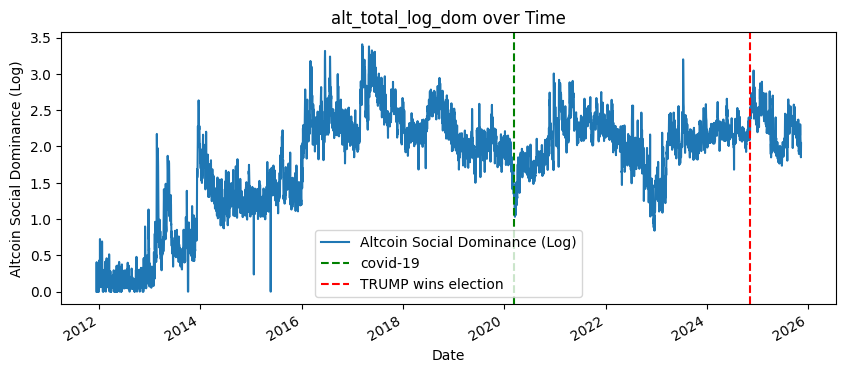

In [10]:
plt.figure(figsize=(10,4))
plt.plot(df_social['Data_UTC'], df_social['alt_total_log_dom'], label='Altcoin Social Dominance (Log)')
plt.xlabel('Date')
plt.ylabel('Altcoin Social Dominance (Log)')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('alt_total_log_dom over Time')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()


## COMBINED

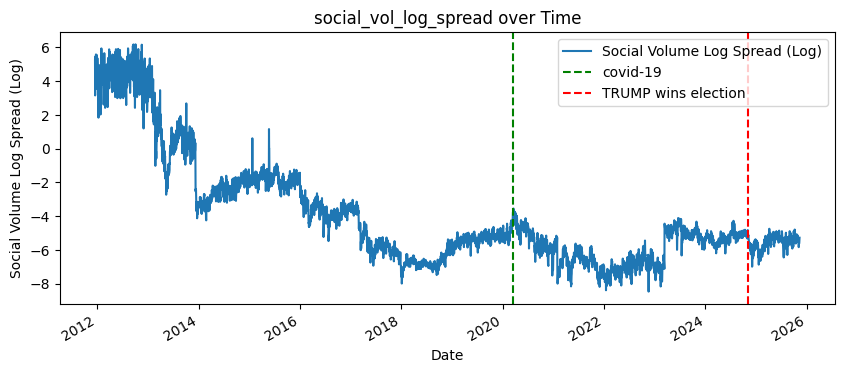

In [11]:
plt.figure(figsize=(10,4))
plt.plot(df_social['Data_UTC'], df_social['social_vol_log_spread'], label='Social Volume Log Spread (Log)')
plt.xlabel('Date')
plt.ylabel('Social Volume Log Spread (Log)')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('social_vol_log_spread over Time')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()


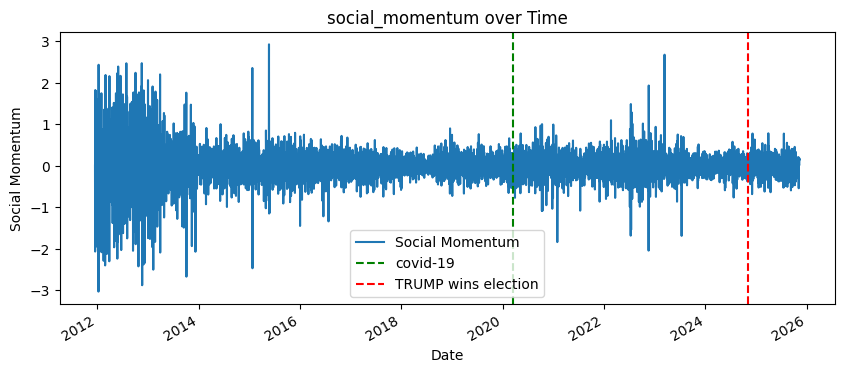

In [12]:
plt.figure(figsize=(10,4))
plt.plot(df_social['Data_UTC'], df_social['social_momentum'], label='Social Momentum')
plt.xlabel('Date')
plt.ylabel('Social Momentum')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('social_momentum over Time')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()


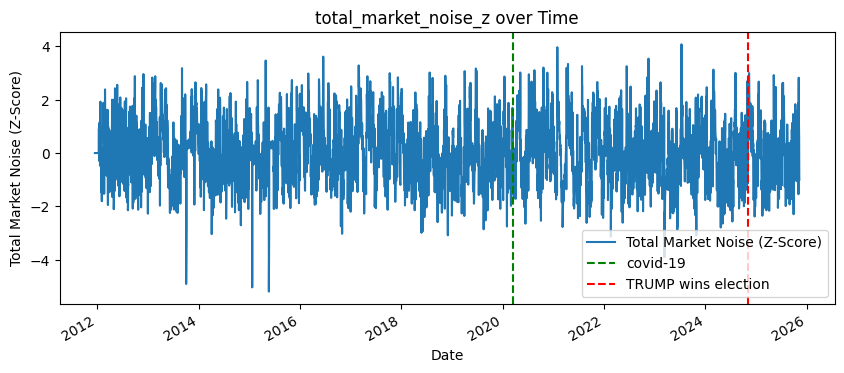

In [13]:
plt.figure(figsize=(10,4))
plt.plot(df_social['Data_UTC'], df_social['total_market_noise_z'], label='Total Market Noise (Z-Score)')
plt.xlabel('Date')
plt.ylabel('Total Market Noise (Z-Score)')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('total_market_noise_z over Time')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()


## INSTITUTIONAL

In [14]:
df_social_instituional = pd.read_csv(rf"raw/2015_institutional_Eth_accumulation.csv")
df_social_instituional['Data_UTC'] = pd.to_datetime(df_social_instituional['Date'], utc=True).dt.strftime("%Y-%m-%d")
# df_eth_onchain_metrics = df_eth_onchain_metrics.query("Data_UTC > '2015-08-06'")
# df_eth_onchain_metrics = df_eth_onchain_metrics.query("Data_UTC > '2015-08-06'")


df_base_2 = df_social_instituional.copy()
df_base_2 = df_base_2.rename(columns={'Social Volume':'social_volume_instituional'
                                  })


df_base_2['Data_UTC'] = pd.to_datetime(df_base_2['Data_UTC'], utc=True,).dt.strftime("%Y-%m-%d")
df_base_2['Data_UTC'] = pd.to_datetime(df_base_2['Data_UTC'], utc=True,)
# Visualizar as primeiras linhas
df_base_2

,Date,BTC / USD,social_volume_instituional,Data_UTC
0,2013-04-12T00:00:00.000Z,NaN,0,2013-04-12 00:00:00+00:00
1,2013-04-12T04:00:00.000Z,NaN,0,2013-04-12 00:00:00+00:00
2,2013-04-12T08:00:00.000Z,NaN,1,2013-04-12 00:00:00+00:00
3,2013-04-12T12:00:00.000Z,NaN,0,2013-04-12 00:00:00+00:00
4,2013-04-12T16:00:00.000Z,NaN,0,2013-04-12 00:00:00+00:00
...,...,...,...,...
27565,2025-11-09T04:00:00.000Z,NaN,4,2025-11-09 00:00:00+00:00
27566,2025-11-09T08:00:00.000Z,NaN,3,2025-11-09 00:00:00+00:00
27567,2025-11-09T12:00:00.000Z,NaN,4,2025-11-09 00:00:00+00:00
27568,2025-11-09T16:00:00.000Z,NaN,5,2025-11-09 00:00:00+00:00


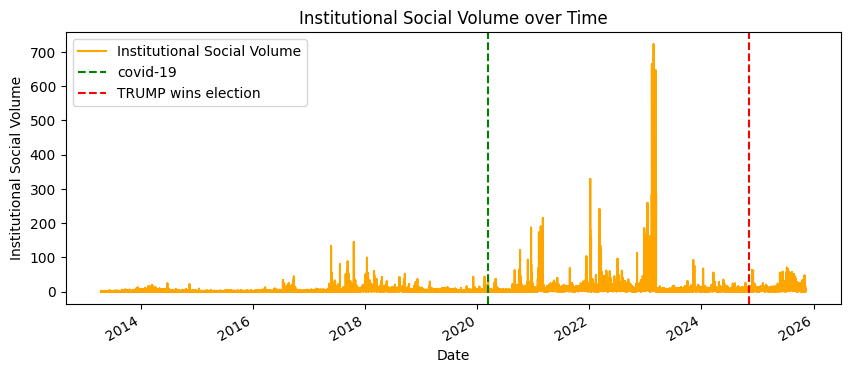

In [15]:
plt.figure(figsize=(10,4))
plt.plot(df_base_2['Data_UTC'], df_base_2['social_volume_instituional'], label='Institutional Social Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Institutional Social Volume')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('Institutional Social Volume over Time')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()


## GOOGLE TRENDS (INDICE RELATIVO DE 0 A 100)

- O Google Trends não fornece o número absoluto de buscas, mas sim um índice de interesse normalizado.O valor $100$ representa o pico de popularidade do termo no período e local selecionados. Um valor de $50$ significa que o termo teve metade da popularidade daquele pico.

start_date : 2014

            Bitcoin  Ethereum  crypto
date                                 
2004-01-01        0         0       1
2004-02-01        0         0       1
2004-03-01        0         0       1
2004-04-01        0         0       1
2004-05-01        0         0       1


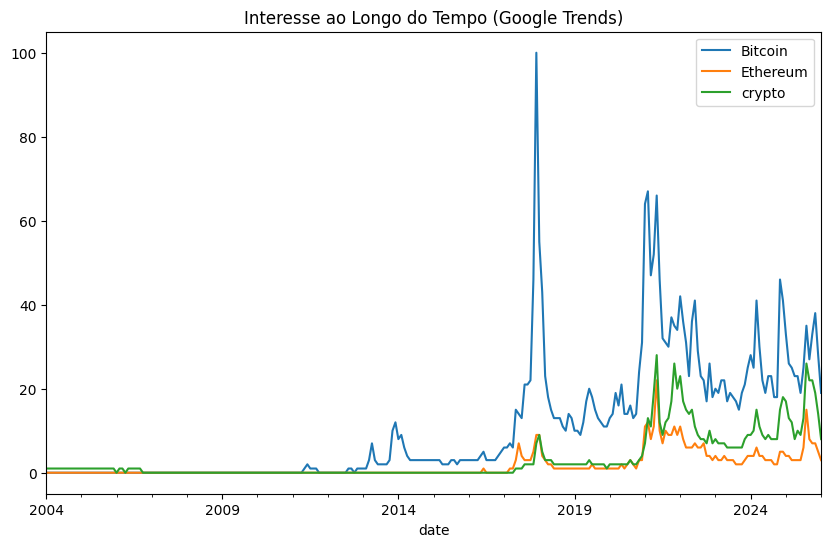

In [16]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

# 1. Conectar ao Google
# hl = idioma, tz = timezone (360 é US CST, mas para dados globais afeta pouco a coleta diária)
pytrends = TrendReq(hl='pt-BR', tz=360)

# 2. Definir palavras-chave (máximo de 5 por vez para comparação)
kw_list = ["Bitcoin", "Ethereum","crypto"]

# 3. Construir o payload
# timeframe='today 5-y' (últimos 5 anos) ou 'all' (desde 2004)
# geo='BR' (apenas Brasil) ou '' (Mundo todo)
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')

# 4. Obter interesse ao longo do tempo
dados = pytrends.interest_over_time()

# 5. Limpeza básica (remover coluna 'isPartial' que indica dados incompletos)
if 'isPartial' in dados.columns:
    dados = dados.drop(columns=['isPartial'])

print(dados.head())

# 6. Visualização rápida
dados.plot(figsize=(10, 6))
plt.title('Interesse ao Longo do Tempo (Google Trends)')
plt.show()